In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
import seaborn as sns

In [2]:
# 데이터 불러오기
data = pd.read_csv('C:/Users/sblim/edu-ai/project/LOCA/EEG DATA 뇌파/EEG_data.csv')

In [3]:
data
## label = 0 : 집중
## label = 1 : 집중x

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,1.0,0.0


In [4]:
data['Attention'].describe()

count    12811.000000
mean        41.313871
std         23.152953
min          0.000000
25%         27.000000
50%         43.000000
75%         57.000000
max        100.000000
Name: Attention, dtype: float64

In [5]:
data['Mediation'].describe()

count    12811.000000
mean        47.182656
std         22.655976
min          0.000000
25%         37.000000
50%         51.000000
75%         63.000000
max        100.000000
Name: Mediation, dtype: float64

In [6]:
## 집중
class0 = data[data['Attention']>=43.0]

## 집중안함
class1 = data[data['Attention']<43.0]

In [7]:
# 결과를 저장할 딕셔너리
raw_data_dict_0 = {}  

subject_ids = class0['SubjectID'].unique()
video_ids = class0['VideoID'].unique()

for subject_id in subject_ids:
    raw_data_dict_0[subject_id] = {}
    for video_id in video_ids:
        # SubjectID와 VideoID에 해당하는 데이터 필터링
        filtered_data = class0[(class0['SubjectID'] == subject_id) & (class0['VideoID'] == video_id)]
        # 필요한 값들을 딕셔너리로 저장
        attention_values = filtered_data['Attention'].tolist()
        mediation_values = filtered_data['Mediation'].tolist()
        raw_data = filtered_data['Raw'].tolist()
        delta_values = filtered_data['Delta'].tolist()
        theta_values = filtered_data['Theta'].tolist()
        alpha1_values = filtered_data['Alpha1'].tolist()
        alpha2_values = filtered_data['Alpha2'].tolist()
        beta1_values = filtered_data['Beta1'].tolist()
        beta2_values = filtered_data['Beta2'].tolist()
        gamma1_values = filtered_data['Gamma1'].tolist()
        gamma2_values = filtered_data['Gamma2'].tolist()

        raw_data_dict_0[subject_id][video_id] = {
            'Attention' : attention_values,
            'Mediation' : mediation_values,
            'Raw': raw_data,
            'Delta': delta_values,
            'Theta': theta_values,
            'Alpha1': alpha1_values,
            'Alpha2': alpha2_values,
            'Beta1': beta1_values,
            'Beta2': beta2_values,
            'Gamma1': gamma1_values,
            'Gamma2': gamma2_values,
        }
        
# 결과를 저장할 딕셔너리
raw_data_dict_1 = {}  

subject_ids = class1['SubjectID'].unique()
video_ids = class1['VideoID'].unique()

for subject_id in subject_ids:
    raw_data_dict_1[subject_id] = {}
    for video_id in video_ids:
        # SubjectID와 VideoID에 해당하는 데이터 필터링
        filtered_data = class1[(class1['SubjectID'] == subject_id) & (class1['VideoID'] == video_id)]
        # 필요한 값들을 딕셔너리로 저장
        attention_values = filtered_data['Attention'].tolist()
        mediation_values = filtered_data['Mediation'].tolist()
        raw_data = filtered_data['Raw'].tolist()
        delta_values = filtered_data['Delta'].tolist()
        theta_values = filtered_data['Theta'].tolist()
        alpha1_values = filtered_data['Alpha1'].tolist()
        alpha2_values = filtered_data['Alpha2'].tolist()
        beta1_values = filtered_data['Beta1'].tolist()
        beta2_values = filtered_data['Beta2'].tolist()
        gamma1_values = filtered_data['Gamma1'].tolist()
        gamma2_values = filtered_data['Gamma2'].tolist()

        raw_data_dict_1[subject_id][video_id] = {
            'Attention' : attention_values,
            'Mediation' : mediation_values,
            'Raw': raw_data,
            'Delta': delta_values,
            'Theta': theta_values,
            'Alpha1': alpha1_values,
            'Alpha2': alpha2_values,
            'Beta1': beta1_values,
            'Beta2': beta2_values,
            'Gamma1': gamma1_values,
            'Gamma2': gamma2_values,
        }

In [8]:
# class 0 
EEG_RAW_0 = raw_data_dict_0[0][2]['Raw']  # 01 - 89, 00 - 101
# EEG_ATT_0 = raw_data_dict_0[0][2]['Attention']

# class 1 
EEG_RAW_1 = raw_data_dict_1[0][2]['Raw']  # 06 - 84, 12 - 90
# EEG_ATT_1 = raw_data_dict_1[0][2]['Attention']

In [9]:
len(EEG_RAW_1)

60

In [10]:
sampling_rate = 101
n00 = len(EEG_RAW_0)
fft_result00 = np.fft.fft(EEG_RAW_0)
frequency00 = np.fft.fftfreq(n00, 1/sampling_rate)

n10 = len(EEG_RAW_1)
fft_result10 = np.fft.fft(EEG_RAW_1)
frequency10 = np.fft.fftfreq(n10, 1/sampling_rate)

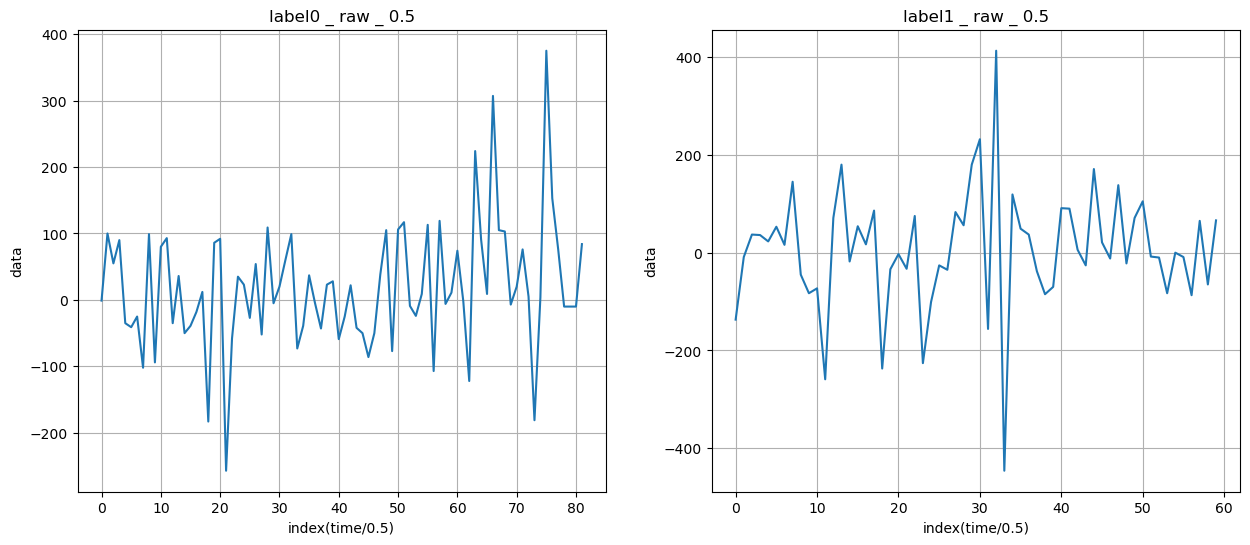

In [11]:
### 원본 raw 데이터 ###
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(EEG_RAW_0)
plt.xlabel('index(time/0.5)')
plt.ylabel('data')
plt.title('label0 _ raw _ 0.5')
plt.grid()

plt.subplot(122)
plt.plot(EEG_RAW_1)
plt.xlabel('index(time/0.5)')
plt.ylabel('data')
plt.title('label1 _ raw _ 0.5')
plt.grid()

In [12]:
# 주파수 대역 설정
delta_freq_range00 = (0.5 <= frequency00) & (frequency00 <= 4.0)
theta_freq_range00 = (4.0 < frequency00) & (frequency00 <= 8.0)
alpha1_freq_range00 = (8.0 < frequency00) & (frequency00 <= 10.0)
alpha2_freq_range00 = (10.0 < frequency00) & (frequency00 <= 12.0)
beta1_freq_range00 = (12.0 < frequency00) & (frequency00 <= 18.0)
beta2_freq_range00 = (18.0 < frequency00) & (frequency00 <= 30.0)
gamma1_freq_range00 = (30.0 < frequency00) & (frequency00 <= 40.0)
gamma2_freq_range00 = (40.0 < frequency00) & (frequency00 <= 50.0)

# 주파수 대역별 주파수 성분 추출
delta_data00 = np.abs(fft_result00[delta_freq_range00])
theta_data00 = np.abs(fft_result00[theta_freq_range00])
alpha1_data00 = np.abs(fft_result00[alpha1_freq_range00])
alpha2_data00 = np.abs(fft_result00[alpha2_freq_range00])
beta1_data00 = np.abs(fft_result00[beta1_freq_range00])
beta2_data00 = np.abs(fft_result00[beta2_freq_range00])
gamma1_data00 = np.abs(fft_result00[gamma1_freq_range00])
gamma2_data00 = np.abs(fft_result00[gamma2_freq_range00])

# 주파수 대역 설정
delta_freq_range10 = (0.5 <= frequency10) & (frequency10 <= 4.0)
theta_freq_range10 = (4.0 < frequency10) & (frequency10 <= 8.0)
alpha1_freq_range10 = (8.0 < frequency10) & (frequency10 <= 10.0)
alpha2_freq_range10 = (10.0 < frequency10) & (frequency10 <= 12.0)
beta1_freq_range10 = (12.0 < frequency10) & (frequency10 <= 18.0)
beta2_freq_range10 = (18.0 < frequency10) & (frequency10 <= 30.0)
gamma1_freq_range10 = (30.0 < frequency10) & (frequency10 <= 40.0)
gamma2_freq_range10 = (40.0 < frequency10) & (frequency10 <= 50.0)

# 주파수 대역별 주파수 성분 추출
delta_data10 = np.abs(fft_result10[delta_freq_range10])
theta_data10 = np.abs(fft_result10[theta_freq_range10])
alpha1_data10 = np.abs(fft_result10[alpha1_freq_range10])
alpha2_data10 = np.abs(fft_result10[alpha2_freq_range10])
beta1_data10 = np.abs(fft_result10[beta1_freq_range10])
beta2_data10 = np.abs(fft_result10[beta2_freq_range10])
gamma1_data10 = np.abs(fft_result10[gamma1_freq_range10])
gamma2_data10 = np.abs(fft_result10[gamma2_freq_range10])

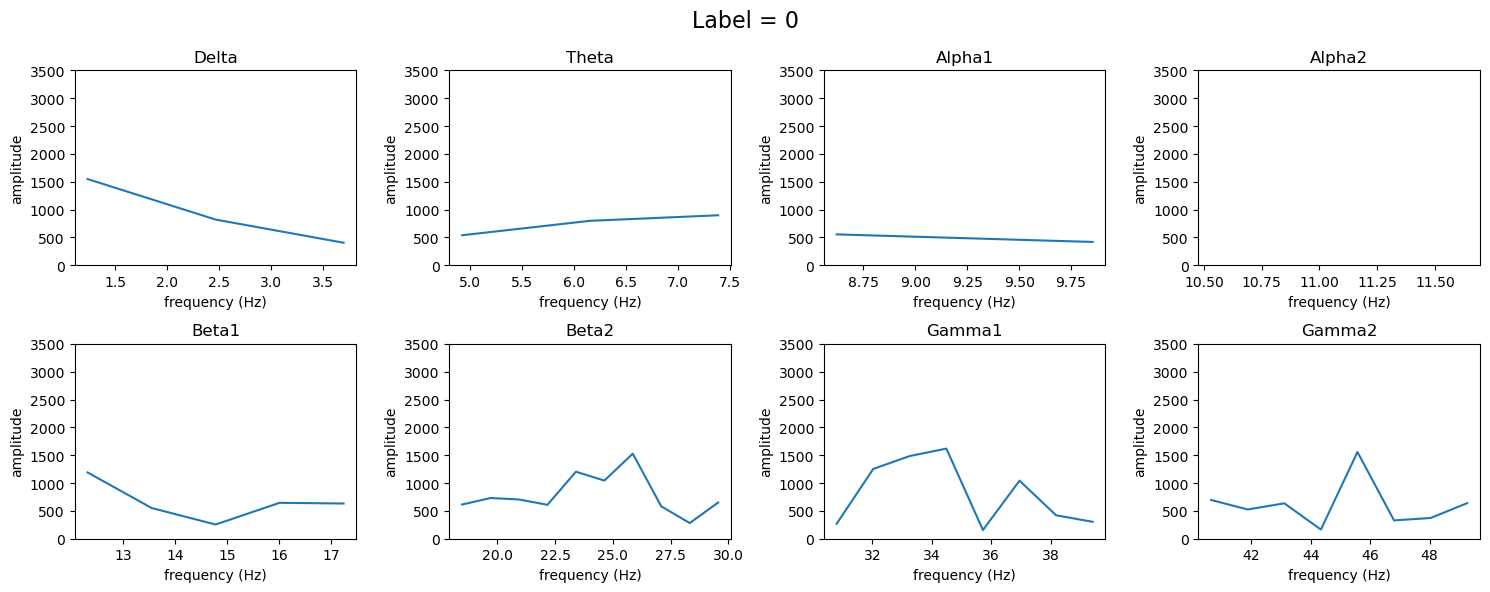

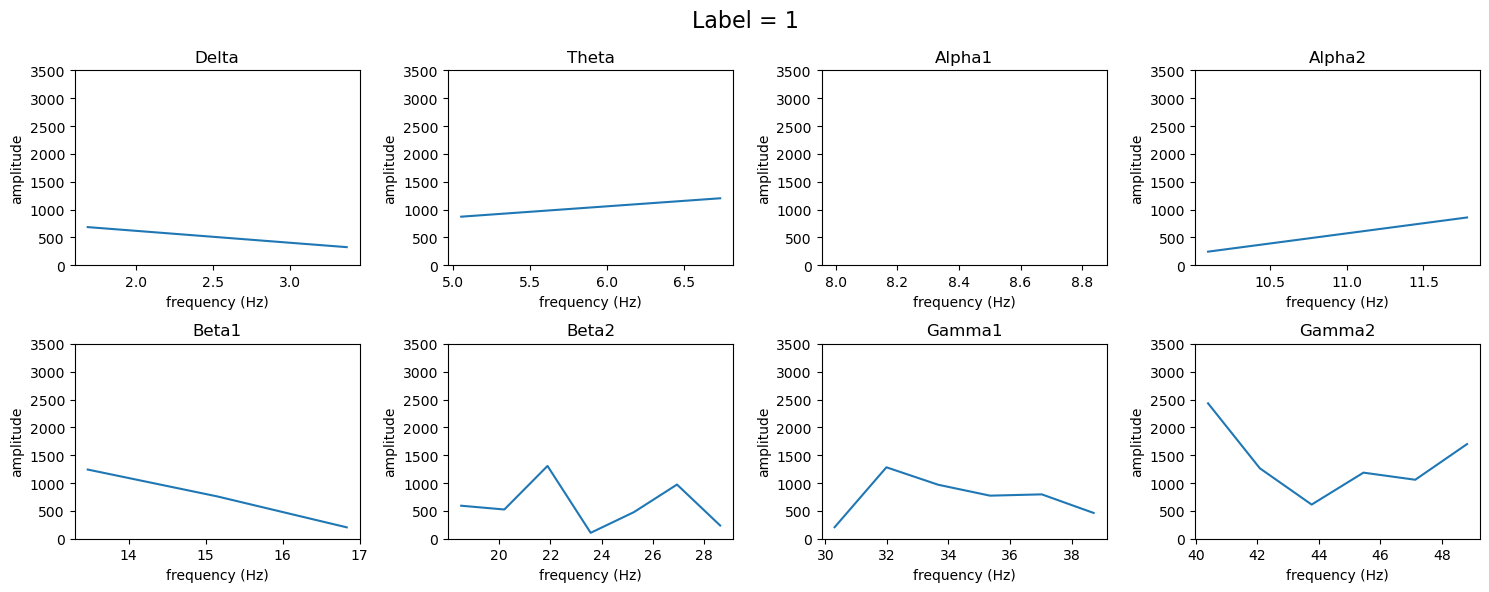

In [13]:
## label = 0, 0.5초
# 주파수 성분 시각화
plt.figure(figsize=(15, 6))

plt.suptitle('Label = 0', fontsize=16)

plt.subplot(2, 4, 1)
plt.plot(frequency00[delta_freq_range00], delta_data00)
plt.title('Delta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 2)
plt.plot(frequency00[theta_freq_range00], theta_data00)
plt.title('Theta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 3)
plt.plot(frequency00[alpha1_freq_range00], alpha1_data00)
plt.title('Alpha1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 4)
plt.plot(frequency00[alpha2_freq_range00], alpha2_data00)
plt.title('Alpha2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 5)
plt.plot(frequency00[beta1_freq_range00], beta1_data00)
plt.title('Beta1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 6)
plt.plot(frequency00[beta2_freq_range00], beta2_data00)
plt.title('Beta2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 7)
plt.plot(frequency00[gamma1_freq_range00], gamma1_data00)
plt.title('Gamma1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 8)
plt.plot(frequency00[gamma2_freq_range00], gamma2_data00)
plt.title('Gamma2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.tight_layout()
plt.show()

## label = 1, 0.5초
plt.figure(figsize=(15, 6))

plt.suptitle('Label = 1', fontsize=16)

plt.subplot(2, 4, 1)
plt.plot(frequency10[delta_freq_range10], delta_data10)
plt.title('Delta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 2)
plt.plot(frequency10[theta_freq_range10], theta_data10)
plt.title('Theta')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 3)
plt.plot(frequency10[alpha1_freq_range10], alpha1_data10)
plt.title('Alpha1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 4)
plt.plot(frequency10[alpha2_freq_range10], alpha2_data10)
plt.title('Alpha2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 5)
plt.plot(frequency10[beta1_freq_range10], beta1_data10)
plt.title('Beta1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 6)
plt.plot(frequency10[beta2_freq_range10], beta2_data10)
plt.title('Beta2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 7)
plt.plot(frequency10[gamma1_freq_range10], gamma1_data10)
plt.title('Gamma1')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.subplot(2, 4, 8)
plt.plot(frequency10[gamma2_freq_range10], gamma2_data10)
plt.title('Gamma2')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.ylim(0, 3500)

plt.tight_layout()
plt.show()